## Eigenfaces

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gif2numpy
import cv2
from math import ceil
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
folder = 'C:/Users/Vahram Babajanyan/Desktop/yalefaces/'

In [116]:
#This class does all the processing
class EigenFaces:
    def __init__(self,folder,token,eigenfaces, include_test = False):
        self.folder = folder
        self.token = token
        self.include_test = include_test
        self.eigenfaces = eigenfaces
    def read_and_downsample(self):
        all_images = os.listdir(self.folder)
        relevant_images = [image for image in all_images if self.token in image]
        if self.include_test:
            pass
        else:
            relevant_images = [image for image in relevant_images if 'test' not in image]
            
        all_converted = {}
        for image in relevant_images:
            all_converted[image[:-4]] = gif2numpy.convert(folder + image)[0][0]
            
        for key in all_converted.keys():
            all_converted[key] = cv2.pyrDown(all_converted[key])
            all_converted[key] = cv2.pyrDown(all_converted[key])
            
        self.all_converted = all_converted
        self.size = len(all_converted.keys())
        self.shape1 = all_converted[key].shape[0]
        self.shape2 = all_converted[key].shape[1]
        self.shape3 = all_converted[key].shape[2]
    def merge_images(self):
        all_converted = self.all_converted.copy()
        for key in all_converted.keys():
            all_converted[key] = all_converted[key].reshape(-1)
        first_key = next(iter(all_converted))
        merge = all_converted[first_key]
        del all_converted[key]
        for key in all_converted.keys():
            merge = np.vstack((merge, all_converted[key]))
        self.merge = merge
    def visualize_original_images(self):
        plt.figure(figsize=(15, 4 * ceil(self.size / 3)), tight_layout = True)
        for index,key in enumerate(self.all_converted.keys()):
            plt.subplot(ceil(self.size / 3), 3, index+1)
            plt.imshow(self.all_converted[key])
            plt.xticks([])  
            plt.yticks([])  
    def get_eigenfaces(self):
        model = PCA(n_components = self.eigenfaces, whiten = True)
        model.fit(self.merge.T)
        
        all_eigenfaces = model.transform(self.merge.T)
        all_eigenfaces = MinMaxScaler().fit_transform(all_eigenfaces)
        self.all_eigenfaces = all_eigenfaces
    def visualize_eigenfaces(self):
        plt.figure(figsize=(10, 4 * ceil(self.eigenfaces / 3)), tight_layout = True)
        for i in range(self.eigenfaces):
            plt.subplot(ceil(self.eigenfaces / 3), 3, i+1)
            plt.imshow(self.all_eigenfaces[:,i].reshape(self.shape1,self.shape2,self.shape3))
            plt.xticks([])  
            plt.yticks([])
    def process(self):
        EigenFaces.read_and_downsample(self)
        EigenFaces.merge_images(self)
        EigenFaces.get_eigenfaces(self)
        
        return 'Processed'
    
    @property
    def merge_(self):
        return self.merge
    @property
    def converted_(self):
        return self.all_converted
    @property
    def eigenfaces_(self):
        return self.all_eigenfaces


#### Subject1

In [117]:
subject1 = EigenFaces(folder,'subject01', eigenfaces = 6)
subject1.process()

'Processed'

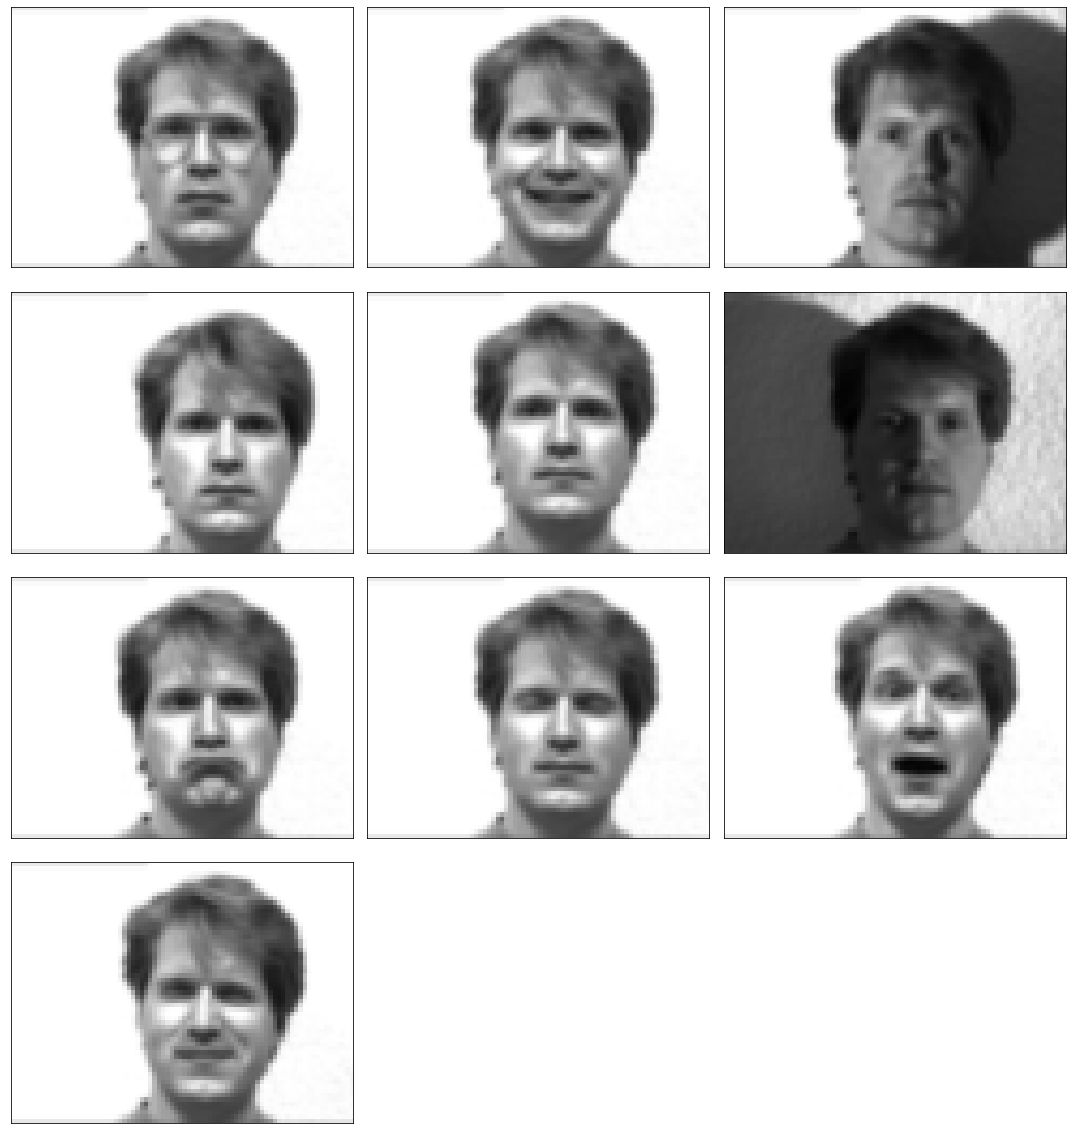

In [119]:
subject1.visualize_original_images()

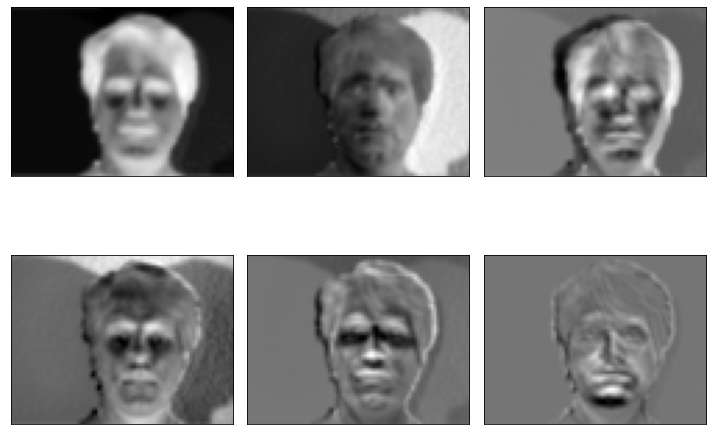

In [120]:
subject1.visualize_eigenfaces()

#### Subject2

In [121]:
subject2 = EigenFaces(folder,'subject02', eigenfaces = 6)
subject2.process()

'Processed'

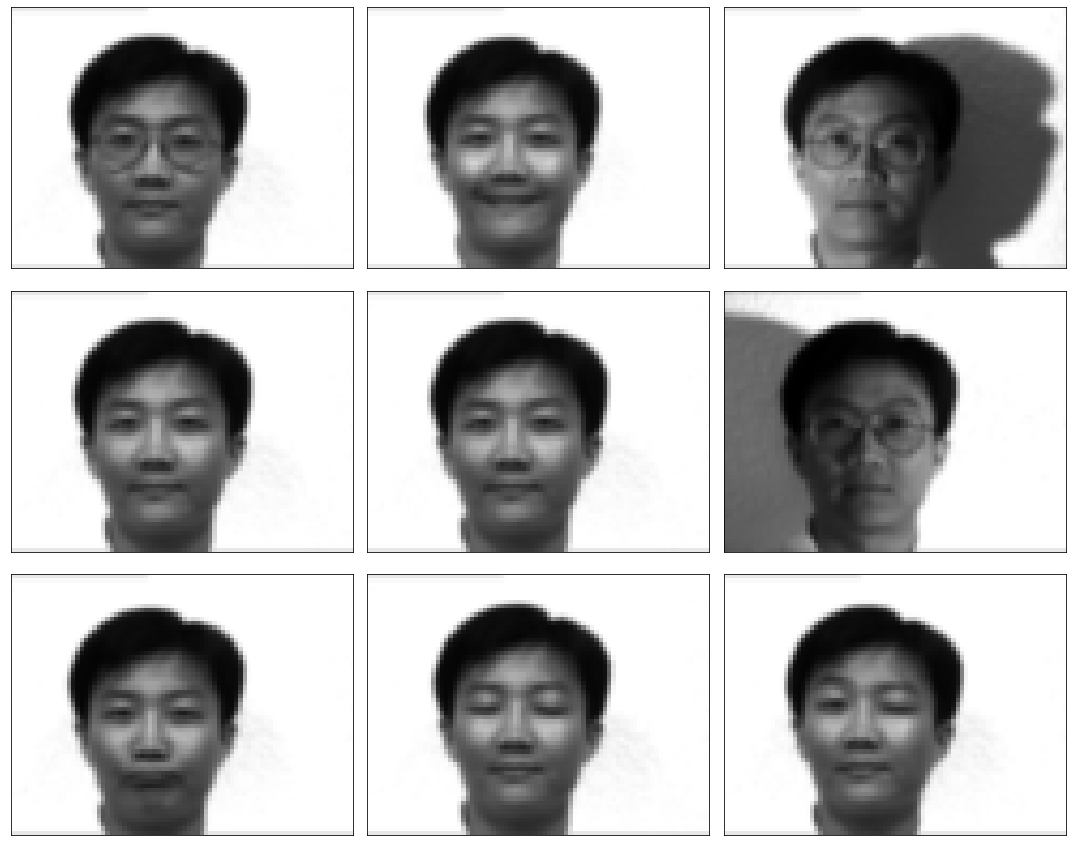

In [122]:
subject2.visualize_original_images()

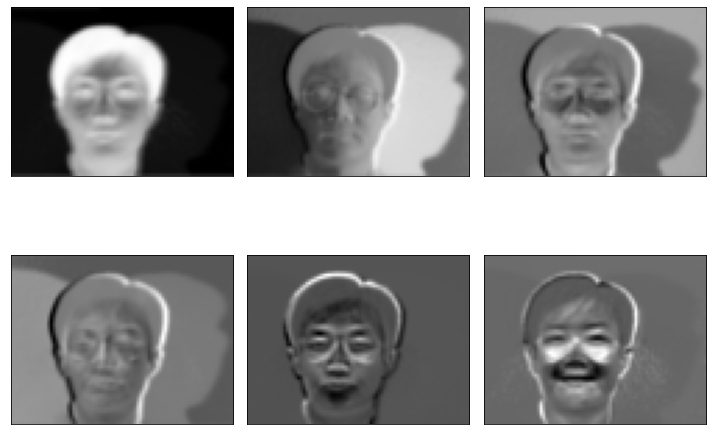

In [123]:
subject2.visualize_eigenfaces()

As regards to patterns in these eigenfaces, one thing is clear - The more variance the eigenvector explains the less complicated are the features represented by it. In other words seems like each next component tries to add an additional layer to the basement, diving more and more into details as the explained variance for each component decreases.